# Psychrometric Chart Comfort Range Color-shading Demostration

- Eric Teitelbaum - eteitelb@princeton.edu
- Dec 2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import datetime
import seaborn #Seaborn is a a stats plotting library that sits on matplotlib
plt.rc('text', usetex=True)
#plt.rc('font', family='sanserif')

In [2]:
#define psychrometric temp bounds
temperature = np.arange(5, 35, 0.1)

#clausius-clapyron constants
a=17.08
b=234.18
saturation = 1000*0.62198*np.exp(77.345+0.0057*(temperature+273.15)-7235/(temperature+273.15))/(101325*np.power((temperature+273.15),8.2)-np.exp(77.345+0.0057*(temperature+273.15)-7235/(temperature+273.15)))


In [3]:
#for an arbitrary fixed comfort zone box calculation

BL = 0.3*1000*0.62198*np.exp(77.345+0.0057*(21+273.15)-7235/(21+273.15))/(101325*np.power((21+273.15),8.2)-np.exp(77.345+0.0057*(21+273.15)-7235/(21+273.15)))
TL = 0.6*1000*0.62198*np.exp(77.345+0.0057*(21+273.15)-7235/(21+273.15))/(101325*np.power((21+273.15),8.2)-np.exp(77.345+0.0057*(21+273.15)-7235/(21+273.15)))
BR = 0.3*1000*0.62198*np.exp(77.345+0.0057*(27+273.15)-7235/(27+273.15))/(101325*np.power((27+273.15),8.2)-np.exp(77.345+0.0057*(27+273.15)-7235/(27+273.15)))
TR = 0.6*1000*0.62198*np.exp(77.345+0.0057*(27+273.15)-7235/(27+273.15))/(101325*np.power((27+273.15),8.2)-np.exp(77.345+0.0057*(27+273.15)-7235/(27+273.15)))
comfort = np.arange(21, 27, 0.1)
def f(t):
    return 1000*0.62198*np.exp(77.345+0.0057*(t+273.15)-7235/(t+273.15))/(101325*np.power((t+273.15),8.2)-np.exp(77.345+0.0057*(t+273.15)-7235/(t+273.15)))

# Conventional chart with comfort box

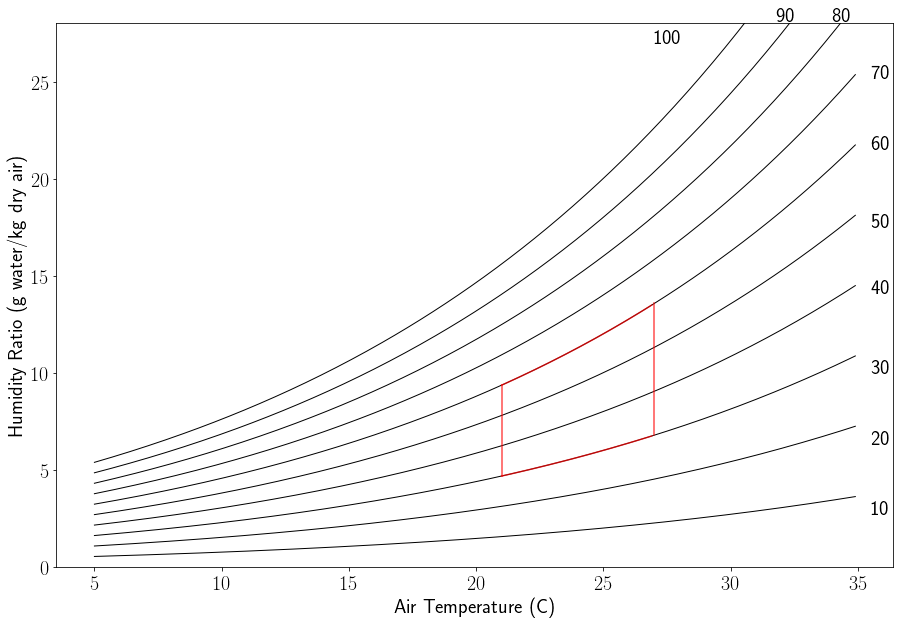

In [4]:
import matplotlib.patches as mpatches
#ax = plt.subplot(111)
plt.figure(figsize=(15,10))

#plot the psychrometric chart

plt.plot(temperature, saturation, 'k-', linewidth = 1)
plt.plot(temperature, saturation*.9, 'k-', linewidth = 1)
plt.plot(temperature, saturation*.8, 'k-', linewidth = 1)
plt.plot(temperature, saturation*.7, 'k-', linewidth = 1)
plt.plot(temperature, saturation*.6, 'k-', linewidth = 1)
plt.plot(temperature, saturation*.5, 'k-', linewidth = 1)
plt.plot(temperature, saturation*.4, 'k-', linewidth = 1)
plt.plot(temperature, saturation*.3, 'k-', linewidth = 1)
plt.plot(temperature, saturation*.2, 'k-', linewidth = 1)
plt.plot(temperature, saturation*.1, 'k-', linewidth = 1)


#arbitrary comfort zone plotting
plt.plot([21,21],[BL,TL], 'r', alpha = 0.7)
plt.plot([27,27],[BR,TR], 'r', alpha = 0.7)
plt.plot(comfort,f(comfort)*.3,'r', alpha = 0.7)
plt.plot(comfort,f(comfort)*.6,'r', alpha = 0.7)
#plt.title("Psychrometric Chart", size=20)
plt.xlabel("Air Temperature (C)", size=20)
plt.ylabel("Humidity Ratio (g water/kg dry air)", size=20)
#ax.set_axis_bgcolor('white')

plt.text(35.5, 2.7, '10%',size=20)
plt.text(35.5, 6.3, '20%',size=20)
plt.text(35.5, 10, '30%',size=20)
plt.text(35.5, 14.1, '40%',size=20)
plt.text(35.5, 17.5, '50%',size=20)
plt.text(35.5, 21.5, '60%',size=20)
plt.text(35.5, 25.2, '70%',size=20)
plt.text(34, 28.1, '80%',size=20)
plt.text(31.8, 28.1, '90%',size=20)
plt.text(27, 27, '100%',size=20)


axes=plt.gca()
axes.set_ylim([0,28])

plt.tick_params(axis='both', labelsize=20)

# Color-shaded Made-over Chart with Comfort Parameters

In [5]:
#define expanded psychro temp range + increment (oC)
temp_air = np.arange(10, 35, .2)

#define expanded psychro humidity range + increment (%RH)
RH_psy = np.arange(0,100,.2)/100

#metabolic rate (W/m2)
MR = 69.8 #1.2 met
#MR = 116.3 #2 met

#skin wettedness (%)
w=0.06

#air velocity (m/s)
v=.1

#look this up from Ed
LR = 16.5

#seated versus standing
Ar_Ad = 0.7 #seated
#look up standing

#emissivity of human
E=0.95
#stefan boltzman constant
o = 0.00000005670367

In [6]:


#skin temp calculation
temp_skin = temp_air*.3812+22.406

#vapor pressure of water on skin's surface
P_sat_skin_psy = np.power(2.718,(77.3450+0.0057*(temp_skin+273.15)-7235/(temp_skin+273.15)))/(np.power((temp_skin+273.15),8.2))/1000
P_sat_air_psy = [[0 for x in range(len(RH_psy))] for x in range(len(temp_air))]
for i in range(len(temp_air)):
    for k in range(len(RH_psy)):
        P_sat_air_psy[i][k] = np.power(2.718,(77.3450+0.0057*(temp_air[i]+273.15)-7235/(temp_air[i]+273.15)))/(np.power((temp_air[i]+273.15),8.2))/1000*RH_psy[k]

Q_conv_free_psy = [[0 for x in range(len(RH_psy))] for x in range(len(temp_air))]
for i in range(len(temp_air)):
    for k in range(len(RH_psy)):
        h_c_free_psy = 0.78*np.power(np.absolute(temp_skin[i]-temp_air[i]),0.56)
        Q_conv_free_psy[i][k] = h_c_free_psy*(temp_skin[i]-temp_air[i])
        

Q_evap_free_psy = [[0 for x in range(len(RH_psy))] for x in range(len(temp_air))]
for i in range(len(temp_air)):
    for k in range(len(RH_psy)):
        h_c_free_psy = 0.78*np.power(np.absolute(temp_skin[i]-temp_air[i]),0.56)       
        h_e_free_psy = h_c_free_psy*LR
        Q_evap_free_psy[i][k] = h_e_free_psy*w*(P_sat_skin_psy[i]-P_sat_air_psy[i][k])
        
#print Q_evap_free_psy
        
T_MRT_psy = [[0 for x in range(len(RH_psy))] for x in range(len(temp_air))]
for i in range(len(temp_air)):
    for k in range(len(RH_psy)):
        T_MRT_psy[i][k] = np.power(np.power((temp_skin[i]+273.15),4)-((MR-Q_evap_free_psy[i][k]-Q_conv_free_psy[i][k])/E/o/0.7),0.25)-273.15
        
        
equivalent = [[0 for x in range(len(RH_psy))] for x in range(len(temp_air))]
for i in range(len(temp_air)):
    for k in range(len(RH_psy)):
        equivalent[i][k] = T_MRT_psy[i][k]-temp_air[i]

In [7]:


Q_conv_forced_psy = [[0 for x in range(len(RH_psy))] for x in range(len(temp_air))]
for i in range(len(temp_air)):
    for k in range(len(RH_psy)):
        h_c_forced_psy = 10.1*np.power(v,0.61)
        Q_conv_forced_psy[i][k] = h_c_forced_psy*(temp_skin[i]-temp_air[i])
        
Q_evap_forced_psy = [[0 for x in range(len(RH_psy))] for x in range(len(temp_air))]
for i in range(len(temp_air)):
    for k in range(len(RH_psy)):
        h_c_forced_psy = 10.1*np.power(v,0.61)       
        h_e_forced_psy = h_c_forced_psy*LR
        Q_evap_forced_psy[i][k] = h_e_free_psy*w*(P_sat_skin_psy[i]-P_sat_air_psy[i][k])
        
#print Q_evap_free_psy
        
T_MRT_forced_psy = [[0 for x in range(len(RH_psy))] for x in range(len(temp_air))]
for i in range(len(temp_air)):
    for k in range(len(RH_psy)):
        T_MRT_forced_psy[i][k] = np.power(np.power((temp_skin[i]+273.15),4)-((MR-Q_evap_forced_psy[i][k]-Q_conv_forced_psy[i][k])/E/o/0.7),0.25)-273.15
        
        
equivalent_forced = [[0 for x in range(len(RH_psy))] for x in range(len(temp_air))]
for i in range(len(temp_air)):
    for k in range(len(RH_psy)):
        equivalent_forced[i][k] = T_MRT_forced_psy[i][k]-temp_air[i]

In [8]:
psy_sat = [[0 for x in range(len(RH_psy))] for x in range(len(temp_air))]
for i in range(len(temp_air)):
    for k in range(len(RH_psy)):
        psy_sat[i][k] = f(temp_air[i])*RH_psy[k]
        
wet_bulb_compare_forced = [[0 for x in range(len(RH_psy))] for x in range(len(temp_air))]
for i in range(len(temp_air)):
    for k in range(len(RH_psy)):
        wet_bulb_compare_forced[i][k]=(temp_air[i]*np.arctan(0.151977*np.power((RH_psy[k]*100+8.313659),0.5))+np.arctan(temp_air[i]+RH_psy[k]*100)-np.arctan(RH_psy[k]*100-1.676331)+0.00391838*np.power(RH_psy[k]*100,1.5)*np.arctan(0.023101*RH_psy[k]*100)-4.686035)-T_MRT_forced_psy[i][k]

dew_point_compare_forced = [[0 for x in range(len(RH_psy))] for x in range(len(temp_air))]
for i in range(len(temp_air)):
    for k in range(len(RH_psy)):
        dew_point_compare_forced[i][k]=243.04*(np.log(RH_psy[k])+((17.625*temp_air[i])/(243.04+temp_air[i])))/(17.625-np.log(RH_psy[k])-((17.625*temp_air[i])/(243.04+temp_air[i])))-T_MRT_forced_psy[i][k]
        
Q_comp_rat_forced = [[0 for x in range(len(RH_psy))] for x in range(len(temp_air))]
for i in range(len(temp_air)):
    for k in range(len(RH_psy)):
        Q_comp_rat_forced[i][k] = (E*o*(np.power((temp_skin[i]+273.15),4)-np.power((T_MRT_forced_psy[i][k]+273.15),4)))/(Q_evap_forced_psy[i][k] + Q_conv_forced_psy[i][k])

#MRT = air temperature - this could be modified later
temp_MRT = temp_air   


Q_rad_forced_v = [[0 for x in range(len(RH_psy))] for x in range(len(temp_air))]
for i in range(len(temp_air)):
    for k in range(len(RH_psy)):
        h_r_forced_v = 4*E*o*Ar_Ad*np.power((273.15+(temp_skin[i]+temp_MRT[i])/2),3)
        Q_rad_forced_v[i][k] = h_r_forced_v*E*(temp_skin[i]-temp_MRT[i])
        

v_forced_v = [[0 for x in range(len(RH_psy))] for x in range(len(temp_air))]
for i in range(len(temp_air)):
    for k in range(len(RH_psy)):
        v_forced_v[i][k] = np.power(((MR-Q_rad_forced_v[i][k])/(10.1*(LR*w*(P_sat_skin_psy[i]-P_sat_air_psy[i][k])+(temp_skin[i]-temp_air[i])))),(1/0.61))
        

/Users/nus/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/Users/nus/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


/Users/nus/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'interpolation', 'fontsize', 'dpi'
  s)
/Users/nus/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'interpolation', 'fontsize', 'dpi'
  s)


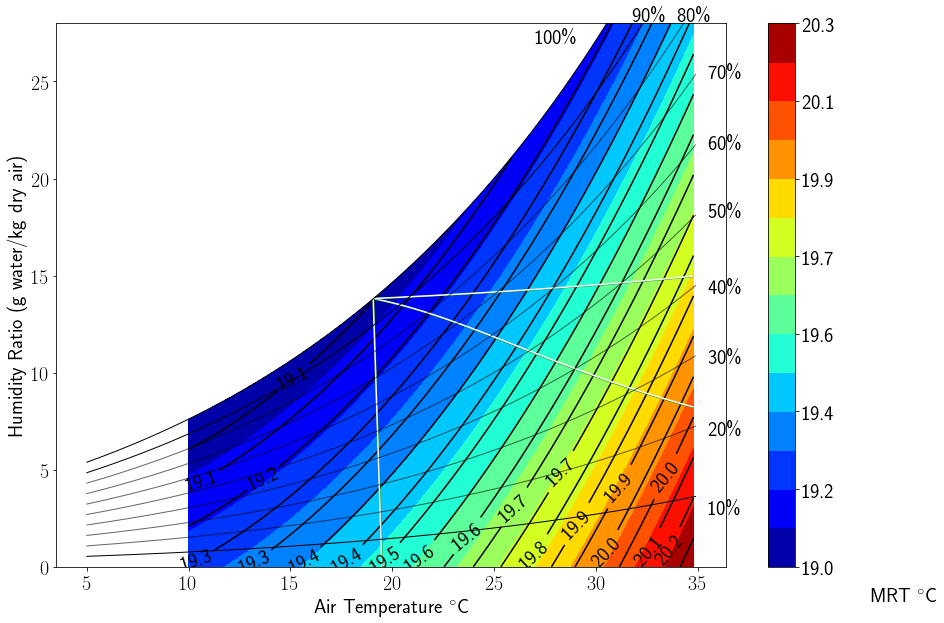

In [9]:
#print T_MRT_psy
plt.figure(figsize=(15,10))
X,Y = np.meshgrid(RH_psy, temp_air)
levels_one = np.linspace(1,1.01,2)
levels_half = np.linspace(0.5,0.505,2)
levels_two = np.linspace(2,2.01,2)
levels_three = np.linspace(3,3.02,2)
levels_four = np.linspace(4,4.04,2)
levels_six = np.linspace(6,6.06,2)

textsize = 20

a=17.08
b=234.18
saturation_psy = 1000*0.62198*np.exp(77.345+0.0057*(temp_air+273.15)-7235/(temp_air+273.15))/(101325*np.power((temp_air+273.15),8.2)-np.exp(77.345+0.0057*(temp_air+273.15)-7235/(temp_air+273.15)))

alph = 0.6
plt.plot(temperature, saturation, 'k-', linewidth = 1, alpha = 1)
plt.plot(temperature, saturation*.9, 'k-', linewidth = 1 , alpha = 1)
plt.plot(temperature, saturation*.8, 'k-', linewidth = 1, alpha = alph)
plt.plot(temperature, saturation*.7, 'k-', linewidth = 1,alpha = alph)
plt.plot(temperature, saturation*.6, 'k-', linewidth = 1,alpha = alph)
plt.plot(temperature, saturation*.5, 'k-', linewidth = 1,alpha = alph)
plt.plot(temperature, saturation*.4, 'k-', linewidth = 1,alpha = alph)
plt.plot(temperature, saturation*.3, 'k-', linewidth = 1,alpha = alph)
plt.plot(temperature, saturation*.2, 'k-', linewidth = 1,alpha = alph)
plt.plot(temperature, saturation*.1, 'k-', linewidth = 1,alpha = 1)


levels_psy_forced = np.linspace(np.amin(T_MRT_forced_psy), np.amax(T_MRT_forced_psy), 15)
levels_wb_forced = np.linspace(-0.01,0.01,2)
CS3=plt.contourf(Y, psy_sat, T_MRT_forced_psy, cmap = 'jet', levels=levels_psy_forced,interpolation='sinc', fontsize = 20, dpi = 1200, alpha = 1)
CS = plt.contour(Y, psy_sat, T_MRT_forced_psy, 20, colors='k', alpha = 1)
plt.clabel(CS, inline=3, fmt='%1.1f', origin='lower', fontsize=textsize)
plt.contour(Y, psy_sat, wet_bulb_compare_forced, cmap = 'ocean', levels=levels_wb_forced, interpolation='sinc', fontsize = 20, dpi = 1200)
plt.contour(Y, psy_sat, equivalent_forced, cmap = 'ocean', levels=levels_wb_forced, interpolation='sinc', fontsize = 20, dpi = 600)
plt.contour(Y, psy_sat, dew_point_compare_forced, cmap = 'ocean', levels=levels_wb_forced, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contourf(Y, psy_sat, Q_comp_rat, cmap = 'ocean', levels=levels_one, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contourf(Y, psy_sat, Q_comp_rat, cmap = 'ocean', levels=levels_half, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contourf(Y, psy_sat, Q_comp_rat, cmap = 'ocean', levels=levels_two, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contourf(Y, psy_sat, Q_comp_rat, cmap = 'ocean', levels=levels_three, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contourf(Y, psy_sat, Q_comp_rat, cmap = 'ocean', levels=levels_four, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contourf(Y, psy_sat, Q_comp_rat, cmap = 'ocean', levels=levels_six, interpolation='sinc', fontsize = 20, dpi = 600)
cbar = plt.colorbar(CS3, orientation='vertical', format="%.1f")


plt.text(35.5, 2.7, '10\%',size=textsize)
plt.text(35.5, 6.8, '20\%',size=textsize)
plt.text(35.5, 10.5, '30\%',size=textsize)
plt.text(35.5, 14.1, '40\%',size=textsize)
plt.text(35.5, 18, '50\%',size=textsize)
plt.text(35.5, 21.5, '60\%',size=textsize)
plt.text(35.5, 25.2, '70\%',size=textsize)
plt.text(34, 28.1, '80\%',size=textsize)
plt.text(31.8, 28.1, '90\%',size=textsize)
plt.text(27, 27, '100\%',size=textsize)



#plt.text(10, 10.5, 'Q$rad$/Q$conv$ = 0.5')
#plt.text(16, 12, '1')
#plt.text(19.5, 15.5, '2')
#plt.text(22.7, 18.3, '4')

plt.text(43.5,-1.75,"MRT $^\circ$C", size=textsize)

#plt.text(21,14,"Dehumidification with", fontsize=textsize)
#plt.text(22,12.5,"M-Cycle EC", fontsize=textsize)
#plt.text(20,2,"Wet-bulb EC", fontsize=textsize)
#plt.text(23.5,8,"M-Cycle EC", fontsize=textsize)

#plt.title("Forced Convection")
plt.xlabel("Air Temperature $^\circ$C", size=textsize)
plt.ylabel("Humidity Ratio (g water/kg dry air)",size=textsize)

axes=plt.gca()
axes.set_ylim([0,28])


plt.tick_params(axis='both', labelsize=textsize)
cbar.ax.tick_params(labelsize=textsize) 

#plt.plot([21,21],[BL,TL], 'r', alpha = 1)
#plt.plot([25,25],[BR,TR], 'r', alpha = 1)
#plt.plot(comfort,f(comfort)*.2,'r', alpha = 1)
#plt.plot(comfort,f(comfort)*.6,'r', alpha = 1)
#plt.savefig("w"+str(w*100)+"MR"+str(MR) + "v" + str(v)+"MRT_forced_small.pdf",format='pdf')

/Users/nus/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'interpolation', 'fontsize', 'dpi'
  s)


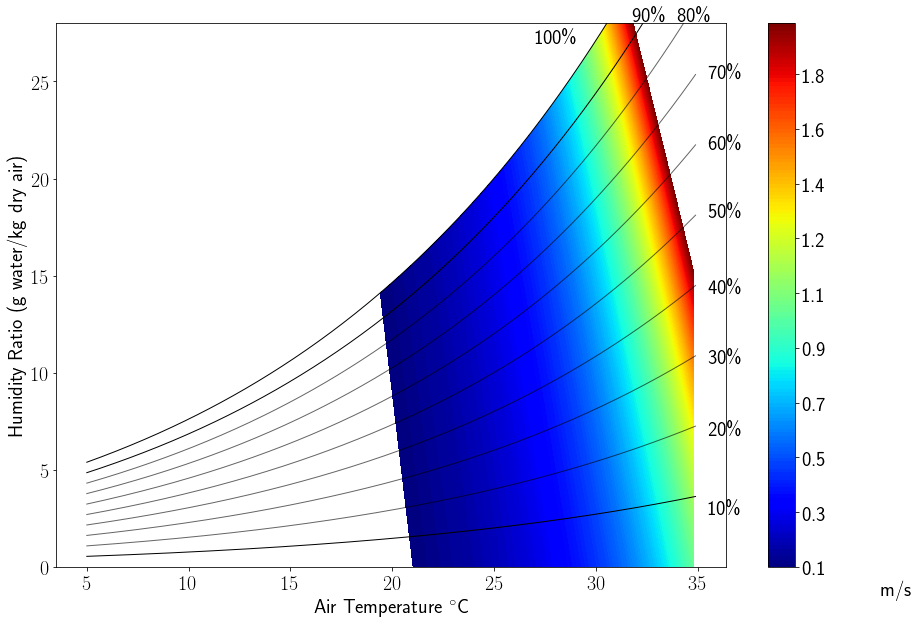

In [10]:
#print T_MRT_psy
plt.figure(figsize=(15,10))
X,Y = np.meshgrid(RH_psy, temp_air)
levels_one = np.linspace(1,1.01,2)
levels_half = np.linspace(0.5,0.505,2)
levels_two = np.linspace(2,2.01,2)
levels_three = np.linspace(3,3.02,2)
levels_four = np.linspace(4,4.04,2)
levels_six = np.linspace(6,6.06,2)

textsize = 20

a=17.08
b=234.18
saturation_psy = 1000*0.62198*np.exp(77.345+0.0057*(temp_air+273.15)-7235/(temp_air+273.15))/(101325*np.power((temp_air+273.15),8.2)-np.exp(77.345+0.0057*(temp_air+273.15)-7235/(temp_air+273.15)))

alph = 0.6
plt.plot(temperature, saturation, 'k-', linewidth = 1, alpha = 1)
plt.plot(temperature, saturation*.9, 'k-', linewidth = 1 , alpha = 1)
plt.plot(temperature, saturation*.8, 'k-', linewidth = 1, alpha = alph)
plt.plot(temperature, saturation*.7, 'k-', linewidth = 1,alpha = alph)
plt.plot(temperature, saturation*.6, 'k-', linewidth = 1,alpha = alph)
plt.plot(temperature, saturation*.5, 'k-', linewidth = 1,alpha = alph)
plt.plot(temperature, saturation*.4, 'k-', linewidth = 1,alpha = alph)
plt.plot(temperature, saturation*.3, 'k-', linewidth = 1,alpha = alph)
plt.plot(temperature, saturation*.2, 'k-', linewidth = 1,alpha = alph)
plt.plot(temperature, saturation*.1, 'k-', linewidth = 1,alpha = 1)


levels_psy_forced = np.linspace(0.1, 2, 150)
levels_wb_forced = np.linspace(.299,.301,2)
CS3=plt.contourf(Y, psy_sat, v_forced_v, cmap = 'jet', levels=levels_psy_forced,interpolation='sinc', fontsize = 20, dpi = 1200, alpha = 1)
#CS = plt.contour(Y, psy_sat, v_forced_v, 100, colors='k', alpha = 1)
#plt.clabel(CS, inline=3, fmt='%1.1f', origin='lower', fontsize=textsize)
#plt.contour(Y, psy_sat, v_forced_v, cmap = 'ocean', levels=levels_wb_forced, interpolation='sinc', fontsize = 20, dpi = 1200)
#plt.contour(Y, psy_sat, equivalent_forced, cmap = 'ocean', levels=levels_wb_forced, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contour(Y, psy_sat, dew_point_compare_forced, cmap = 'ocean', levels=levels_wb_forced, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contourf(Y, psy_sat, Q_comp_rat, cmap = 'ocean', levels=levels_one, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contourf(Y, psy_sat, Q_comp_rat, cmap = 'ocean', levels=levels_half, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contourf(Y, psy_sat, Q_comp_rat, cmap = 'ocean', levels=levels_two, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contourf(Y, psy_sat, Q_comp_rat, cmap = 'ocean', levels=levels_three, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contourf(Y, psy_sat, Q_comp_rat, cmap = 'ocean', levels=levels_four, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contourf(Y, psy_sat, Q_comp_rat, cmap = 'ocean', levels=levels_six, interpolation='sinc', fontsize = 20, dpi = 600)
cbar = plt.colorbar(CS3, orientation='vertical', format="%.1f")


plt.text(35.5, 2.7, '10\%',size=textsize)
plt.text(35.5, 6.8, '20\%',size=textsize)
plt.text(35.5, 10.5, '30\%',size=textsize)
plt.text(35.5, 14.1, '40\%',size=textsize)
plt.text(35.5, 18, '50\%',size=textsize)
plt.text(35.5, 21.5, '60\%',size=textsize)
plt.text(35.5, 25.2, '70\%',size=textsize)
plt.text(34, 28.1, '80\%',size=textsize)
plt.text(31.8, 28.1, '90\%',size=textsize)
plt.text(27, 27, '100\%',size=textsize)



#plt.text(10, 10.5, 'Q$rad$/Q$conv$ = 0.5')
#plt.text(16, 12, '1')
#plt.text(19.5, 15.5, '2')
#plt.text(22.7, 18.3, '4')

plt.text(44,-1.45,"m/s", size=textsize)

#plt.text(21,14,"Dehumidification with", fontsize=textsize)
#plt.text(22,12.5,"M-Cycle EC", fontsize=textsize)
#plt.text(20,2,"Wet-bulb EC", fontsize=textsize)
#plt.text(23.5,8,"M-Cycle EC", fontsize=textsize)

#plt.title("Forced Convection")
plt.xlabel("Air Temperature $^\circ$C", size=textsize)
plt.ylabel("Humidity Ratio (g water/kg dry air)",size=textsize)

axes=plt.gca()
axes.set_ylim([0,28])


plt.tick_params(axis='both', labelsize=textsize)
cbar.ax.tick_params(labelsize=textsize) 

#plt.plot([21,21],[BL,TL], 'r', alpha = 1)
#plt.plot([25,25],[BR,TR], 'r', alpha = 1)
#plt.plot(comfort,f(comfort)*.2,'r', alpha = 1)
#plt.plot(comfort,f(comfort)*.6,'r', alpha = 1)

#plt.savefig("w"+str(w*100)+"MR"+str(MR)+"wind.pdf",format='pdf')

/Users/nus/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'interpolation', 'fontsize', 'dpi', 'ylim'
  s)


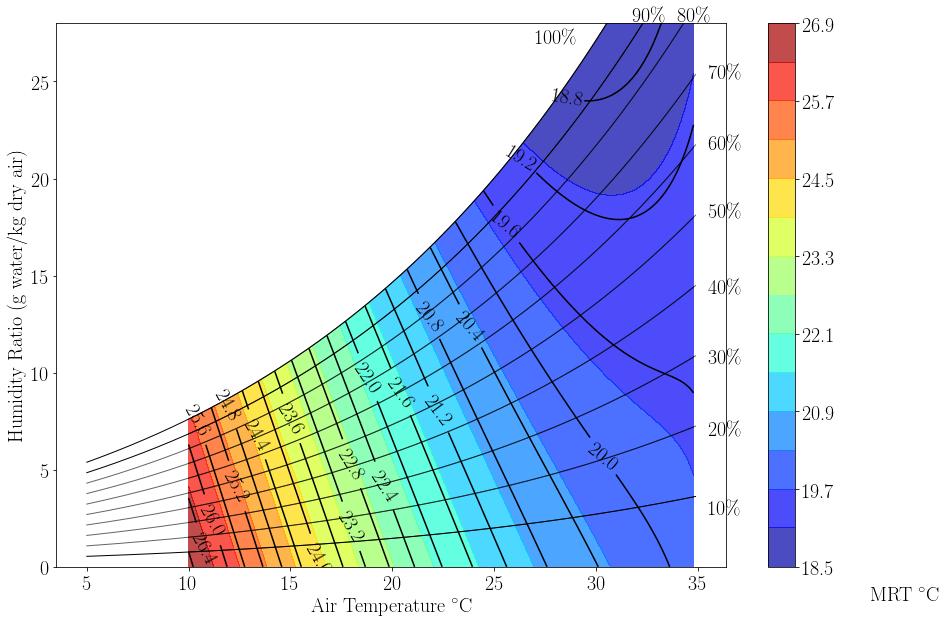

In [11]:

ax=plt.figure(figsize=(15,10))
X,Y = np.meshgrid(RH_psy, temp_air)
levels_one = np.linspace(1,1.01,2)
levels_half = np.linspace(0.5,0.505,2)
levels_two = np.linspace(2,2.01,2)
levels_three = np.linspace(3,3.02,2)
levels_four = np.linspace(4,4.04,2)
levels_six = np.linspace(6,6.06,2)

a=17.08
b=234.18
saturation_psy = 1000*0.62198*np.exp(77.345+0.0057*(temp_air+273.15)-7235/(temp_air+273.15))/(101325*np.power((temp_air+273.15),8.2)-np.exp(77.345+0.0057*(temp_air+273.15)-7235/(temp_air+273.15)))

alph = 0.6
plt.plot(temp_air, saturation_psy, 'k-', linewidth = 1, alpha = alph,)
plt.plot(temp_air, saturation_psy*.9, 'k-', linewidth = 1 , alpha = alph)
plt.plot(temp_air, saturation_psy*.8, 'k-', linewidth = 1, alpha = alph)
plt.plot(temp_air, saturation_psy*.7, 'k-', linewidth = 1,alpha = alph)
plt.plot(temp_air, saturation_psy*.6, 'k-', linewidth = 1,alpha = alph)
plt.plot(temp_air, saturation_psy*.5, 'k-', linewidth = 1,alpha = alph)
plt.plot(temp_air, saturation_psy*.4, 'k-', linewidth = 1,alpha = alph)
plt.plot(temp_air, saturation_psy*.3, 'k-', linewidth = 1,alpha = alph)
plt.plot(temp_air, saturation_psy*.2, 'k-', linewidth = 1,alpha = alph)
plt.plot(temp_air, saturation_psy*.1, 'k-', linewidth = 1,alpha = alph)

plt.plot(temperature, saturation, 'k-', linewidth = 1, alpha = 1)
plt.plot(temperature, saturation*.9, 'k-', linewidth = 1 , alpha = 1)
plt.plot(temperature, saturation*.8, 'k-', linewidth = 1, alpha = alph)
plt.plot(temperature, saturation*.7, 'k-', linewidth = 1,alpha = alph)
plt.plot(temperature, saturation*.6, 'k-', linewidth = 1,alpha = alph)
plt.plot(temperature, saturation*.5, 'k-', linewidth = 1,alpha = alph)
plt.plot(temperature, saturation*.4, 'k-', linewidth = 1,alpha = alph)
plt.plot(temperature, saturation*.3, 'k-', linewidth = 1,alpha = alph)
plt.plot(temperature, saturation*.2, 'k-', linewidth = 1,alpha = alph)
plt.plot(temperature, saturation*.1, 'k-', linewidth = 1,alpha = 1)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

levels_psy = np.linspace(np.amin(T_MRT_psy), np.amax(T_MRT_psy), 15)
levels_wb = np.linspace(-0.01,0.01,2)

CS3=plt.contourf(Y, psy_sat, T_MRT_psy, cmap = 'jet', levels=levels_psy,interpolation='sinc', fontsize = 20, dpi = 1200, alpha = 0.7, ylim=(0,28))

CS = plt.contour(Y, psy_sat, T_MRT_psy, 20, colors='k', alpha = 1)
plt.clabel(CS, fontsize=textsize, inline=1, fmt='%1.1f', origin='lower', fontzize = textsize)

#plt.contour(Y, psy_sat, wet_bulb_compare, cmap = 'ocean', levels=levels_wb, interpolation='sinc', fontsize = 20, dpi = 1200)
#plt.contour(Y, psy_sat, equivalent, cmap = 'ocean', levels=levels_wb, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contour(Y, psy_sat, dew_point_compare, cmap = 'ocean', levels=levels_wb, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contourf(Y, psy_sat, Q_comp_rat, cmap = 'ocean', levels=levels_one, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contourf(Y, psy_sat, Q_comp_rat, cmap = 'ocean', levels=levels_half, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contourf(Y, psy_sat, Q_comp_rat, cmap = 'ocean', levels=levels_two, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contourf(Y, psy_sat, Q_comp_rat, cmap = 'ocean', levels=levels_three, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contourf(Y, psy_sat, Q_comp_rat, cmap = 'ocean', levels=levels_four, interpolation='sinc', fontsize = 20, dpi = 600)
#plt.contourf(Y, psy_sat, Q_comp_rat, cmap = 'ocean', levels=levels_six, interpolation='sinc', fontsize = 20, dpi = 600)
cbar = plt.colorbar(CS3, orientation='vertical', format="%.1f")

#plt.scatter(E219_temp, E219_g, c=24.4, cmap=cm.jet, norm = mpl.colors.Normalize(vmin=np.amin(T_MRT_psy),vmax=np.amax(T_MRT_psy)))


plt.text(35.5, 2.7, '10\%',size=textsize)
plt.text(35.5, 6.8, '20\%',size=textsize)
plt.text(35.5, 10.5, '30\%',size=textsize)
plt.text(35.5, 14.1, '40\%',size=textsize)
plt.text(35.5, 18, '50\%',size=textsize)
plt.text(35.5, 21.5, '60\%',size=textsize)
plt.text(35.5, 25.2, '70\%',size=textsize)
plt.text(34, 28.1, '80\%',size=textsize)
plt.text(31.8, 28.1, '90\%',size=textsize)
plt.text(27, 27, '100\%',size=textsize)





#plt.text(10, 10.5, 'Q$rad$/Q$conv$ = 0.5')
#plt.text(16, 12, '1')
#plt.text(19.5, 15.5, '2')
#plt.text(22.7, 18.3, '4')

plt.text(43.5,-1.75,"MRT $^\circ$C", size=textsize)

#plt.text(24.5,17,"Dehumidification with", fontsize=textsize)
#plt.text(27,16,"M-Cycle EC", fontsize=textsize)
#plt.text(23.5,8,"Wet-bulb EC", fontsize=textsize)
#plt.text(28,11.5,"M-Cycle EC", fontsize=textsize)

#plt.title("Free Convection", size=20)
plt.xlabel(r"Air Temperature $^\circ$C", size=textsize)
plt.ylabel(r"Humidity Ratio (g water/kg dry air)",size=textsize)

axes=plt.gca()
axes.set_ylim([0,28])

#plt.text(5,-2," \textcopyright Eric Teitelbaum, 2017",fontsize=12)

plt.tick_params(axis='both', labelsize=textsize)
cbar.ax.tick_params(labelsize=textsize) 


#plt.plot([21.5,19.5],[0.5,12], 'r', alpha = 1)
#plt.plot([19.5,24],[12,12], 'r', alpha = 1)
#plt.plot([24,26.5],[12,0.5],'r', alpha = 1)
#plt.plot([26.5,21.5],[0.5,0.5],'r', alpha = 1)

#plt.plot([-5,26],[2.5,2.5],'k', alpha = 1)
#plt.plot([5,25.5],[5.3,5.3],'k', alpha = 1)

#plt.plot(30, 10, 'ro')
#plt.plot(E219_temp, E219_g, 'ro')
#plt.plot([21,21],[BL,TL], 'r', alpha = 1)
#plt.plot([27,27],[BR,TR], 'r', alpha = 1)
#plt.plot(comfort,f(comfort)*.3,'r', alpha = 1)
#plt.plot(comfort,f(comfort)*.6,'r', alpha = 1)
#plt.savefig("w"+str(w*100)+"MR"+str(MR)+"MRT_free_small.pdf",format='pdf')
#plt.savefig("w"+str(w*100)+"MR"+str(MR)+"MRT_humidity.pdf",format='pdf')